In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

In [85]:
#parameters
lambda_param = 1 #rate parameter for first poisson DGP
lambda_param2 = 3 #rate parameter for second poisson DGP

n = 100000 #amount of uniform realizations

cutoff = n/10000 #percentage that is deemed negligible

unif_num = np.random.uniform(0,1,n) #uniform realizations stored in an array
unif_num2 = np.random.uniform(0,1,n) #uniform realizations stored in an array

wait_time = np.zeros(n) #iid exponential wait times

arr_events = [] #array to store number of poisson events per interval for the first DGP
arr_events2 = [] #array to store number of poisson events per interval for the second DGP

time = 0 
current_events = 0

#add wait times until they total over one time interval adding the occurred events to the array
for i in range (n):

    wait_time[i] = -math.log(unif_num[i]) / lambda_param #transform U(0,1) to wait times for poisson
    time += wait_time[i] #add wait time to get to the next poisson event

    if(time < 1): #if the next event occured in the interval

        current_events +=1 #increment events in this interval

    if(time > 1): #if the next event happened after the interval

        arr_events.append(current_events) #add number of occurred events to the array
        time = 0 #reset time to 0
        current_events = 0 #reset events to 0

time = 0 
current_events = 0

for i in range (n):

    wait_time[i] = -math.log(unif_num2[i]) / lambda_param2 #transform U(0,1) to wait times for poisson
    time += wait_time[i] #add wait time to get to the next poisson event

    if(time < 1): #if the next event occured in the interval

        current_events +=1 #increment events in this interval

    if(time > 1): #if the next event happened after the interval

        arr_events2.append(current_events) #add number of occurred events to the array
        time = 0 #reset time to 0
        current_events = 0 #reset events to 0

In [86]:
#find size of smaller array to subtract the correct amount of times
if(len(arr_events) > len(arr_events2)):
    length = len(arr_events2)
else:
    length = len(arr_events)

skellam_events = np.zeros(length) #array to hold differences

for i in range(0, length):
    skellam_events[i] = arr_events[i] - arr_events2[i] #fill array with differences

dict_events = Counter(skellam_events) #create dictionary of key-value pairs

for j in dict_events:

    if(dict_events[j] > cutoff): #if not negligible

        dict_events[j] = dict_events[j] * (1/length) #reformat as percentage
    
    else:
        
        dict_events[j] = 0 #set negligible values to 0

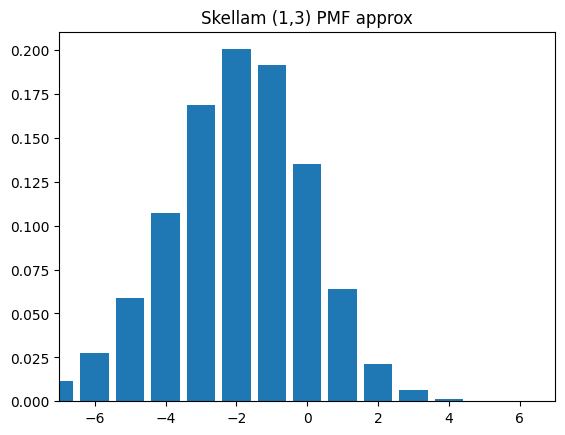

In [87]:
x_titles = list(dict_events.keys()) #number of events per interval
heights = list(dict_events.values()) #percentages of events per interval
plot_title = f"Skellam ({lambda_param},{lambda_param2}) PMF approx."

plt.title(plot_title)

plt.bar(x_titles, heights)
plt.xlim(-7, 7)
plt.show()